# DBSCAN with scikit learn

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Code
```python
from sklearn.cluster import DBSCAN
model = DBSCAN(<parameters>)
y_new = model.fit_predict(X)
```

[Official Reference](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [12]:
mu = np.array([3,3])
cov = np.eye(2)
X = np.vstack([np.random.multivariate_normal(mu, cov, 100), 
               np.random.multivariate_normal(-mu, cov, 100)])

In [15]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1)
y_new = model.fit_predict(X)

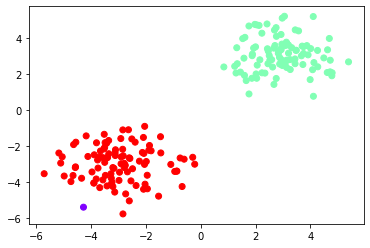

In [16]:
plt.scatter(X[:,0], X[:,1], c=y_new, cmap='rainbow')

In [19]:
model.components_.shape

(192, 2)

In [20]:
model.core_sample_indices_.shape

(192,)

In [22]:
DBSCAN?

## Parameters
- `eps`: the $\epsilon$ used for finding neighborhood
- `min_samples`: a sample is considered as a core sample if its $\epsilon$-ball contains at least `min_sample` samples (including itself)

## Attributes
- `core_sample_indices_`: an array of shape `(n_core_samples,)` that stores the indices of the core samples
- `components_`: an array of shape `(n_core_samples, n_features)` that stores the core samples as rows
- `labels_`: an array of shape `(n_samples,)` that stores the label of each sample, where `-1` stands for noise

## Sample data

##### Exercise 1
Let  
```python
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])
```

In [68]:
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])

In [25]:
y1 = DBSCAN().fit_predict(X)

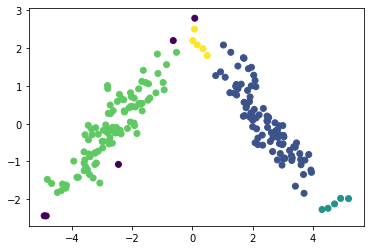

In [26]:
plt.scatter(X[:,0], X[:,1], c=y1)

In [77]:
y2 = DBSCAN(eps=0.7).fit_predict(X)

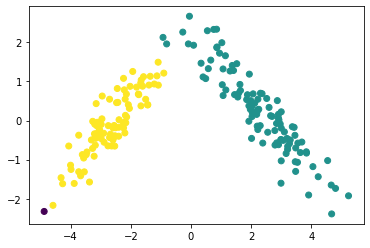

In [78]:
plt.scatter(X[:,0], X[:,1], c=y2)

###### 1(a)
Apply the DBSCAN algorithm to `X` with the default setting and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
Print `model.core_sample_indices_.shape` .

In [ ]:
### your answer here

###### 1(b)
Apply the DBSCAN algorithm to `X` with `eps=1` and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
Print `model.core_sample_indices_.shape` .

In [ ]:
### your answer here

##### 1(c)
Apply the DBSCAN algorithm to `X` with `min_samples=10` and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
Print `model.core_sample_indices_.shape` .

In [ ]:
### your answer here

###### 1(d)
Finding an appropriate `eps` is the main task for the DBSCAN algorithm.  
Let `dist` be the distance matrix between rows in `X` .
The code below find the average of the distances between one sample to its $k$-th nearest sample.
```python
k = 10
sort_dist = dist.copy()
sort_dist.partition(k)
sort_dist[:,:k+1].max(axis=1).mean()
```
This can be a reference for the choice of `eps` .

In [ ]:
### your answer here

###### 1(e)
Finding an appropriate `min_samples` is another task for the DBSCAN algorithm.  
Let `dist` be the distance matrix between rows in `X` .
The code below generate the histogram of the number of neighbors inside the $\epsilon$-balls centered at each sample.
```python
eps = 0.5
n_nbrs = np.sum(dist < 0.5, axis=1)
plt.hist(n_nbrs)
```
This can be a reference for the choice of `min_samples` .

In [ ]:
### your answer here

##### Exercise 2
Let  
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
```

###### 2(a)
Apply the $k$-means algorithm to `X` with $k=2$ and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
(Each row is in $\mathbb{R}^4$.  
Just pick arbitrary two coordinates to plot the points.)  
Print `model.inertia_` .

In [ ]:
### your answer here

###### 2(b)
Apply the $k$-means algorithm to `X` with $k=3$ and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
(Each row is in $\mathbb{R}^4$.  
Just pick arbitrary two coordinates to plot the points.)  
Print `model.inertia_` .

In [ ]:
### your answer here

###### 2(c)
Run  
```python
ins = [KMeans(k).fit(X).inertia_ for k in range(1,6)]
plt.plot(np.arange(1,6), ins)
```
What does it means?  
What is a good guess of the number of clusters?

In [ ]:
### your answer here

##### Exercise 3
Let  
```python
arr = plt.imread('incrediville-side.jpg')
m,n,c = arr.shape
X = arr.reshape(-1,3)
```

###### 3(a)
Print `X.shape` .  
What are the rows in `X` .

In [ ]:
### your answer here

###### 3(b)
Apply the $k$-means algorighm to `X` and obtain `y_new` .  
Let  
```python
img = (y_new == 0).reshape(m, n)
plt.imshow(img, cmap='Greys')
```
Change `0` to `1` or `2` .  
What do these pictures mean?  
Is the black region always connected?

In [ ]:
### your answer here

## Experiments

##### Exercise 4
Let  
```python
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])
```

###### 4(a)
Apply the $k$-means algorithm to `X` and obtain the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
Plot the points (rows) in `model.cluster_centers_` with `c='r'` .

In [ ]:
### your answer here

###### 4(b)
Check if `y_new` and `model.labels_` are the same.

In [ ]:
### your answer here

###### 4(c)
Compute the inertia and compare your answer with `model.inertia_` .  
Recall that the inertia of a clustered data is  
$$\sum_{i,j} \|{\bf x}_i - \mu_j\|^2,$$ 
where the summation runs through all pairs $(i,j)$ such that ${\bf x}_i$ is in the $j$-th cluster with center $\mu_j$.

In [ ]:
### your answer here

##### Exercise 5
Let  
```python
X = 5 * np.random.randn(1000,2)
lengths = np.linalg.norm(X, axis=1)
band1 = (lengths > 1) & (lengths <2)  
band2 = (lengths > 3) & (lengths <4)  
X = X[band1 | band2, :]
```
Apply the $k$-means algorithm to `X` with $k=2$  
(or other $k$ if you wish)  
and get the prediction `y_new` .  
Plot the points (rows) in `X` with `c=y_new` .  
Plot the cluster centers in red.  
Is it a good clustering?  
Why it is good?  Or why it does not work well?

In [ ]:
### your answer here